In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")
print(df)

      VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0     5YJ3E1EBXK      King  Seattle    WA        98178        2019    TESLA   
1     5YJYGDEE3L    Kitsap  Poulsbo    WA        98370        2020    TESLA   
2     KM8KRDAF5P    Kitsap   Olalla    WA        98359        2023  HYUNDAI   
3     5UXTA6C0XM    Kitsap  Seabeck    WA        98380        2021      BMW   
4     JTMAB3FV7P  Thurston  Rainier    WA        98576        2023   TOYOTA   
...          ...       ...      ...   ...          ...         ...      ...   
1012  7SAYGDEE0P      King  Seattle    WA        98122        2023    TESLA   
1013  KNDC3DLC4N      King  Seattle    WA        98133        2022      KIA   
1014  WA1F2BFY5P      King  Seattle    WA        98146        2023     AUDI   
1015  1C4RJYE68N      King  Seattle    WA        98115        2022     JEEP   
1016  WBA33AG03N      King  Seattle    WA        98109        2022      BMW   

               Model                   Electric Veh

#### Let's do the Inspection of the data  as in Exploratory Data Analysis we first Inspect the data.

##### 1.So First lets get some information about the dataset by using info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   VIN (1-10)                                         1017 non-null   object
 1   County                                             1017 non-null   object
 2   City                                               1017 non-null   object
 3   State                                              1017 non-null   object
 4   Postal Code                                        1017 non-null   int64 
 5   Model Year                                         1017 non-null   int64 
 6   Make                                               1017 non-null   object
 7   Model                                              1017 non-null   object
 8   Electric Vehicle Type                              1017 non-null   object
 9   Clean Alternative F

##### 2.Let's see the first 5 rows for better understanding by using head() 

In [9]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,37,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011902
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,23,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035091100
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,53035092802
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,35,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,53035091301
4,JTMAB3FV7P,Thurston,Rainier,WA,98576,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,2,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530


##### 3.For getting the statistical information we will be using .describe()

In [10]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1.017000e+03,1.017000e+03
mean,98236.195674,2020.781711,69.365782,1081.710914,30.548673,2.319944e+08,5.303936e+10
std,284.230509,3.188862,96.417736,7889.976686,15.158865,8.042506e+07,1.630303e+07
min,98002.000000,2011.000000,0.000000,0.000000,1.000000,1.860498e+06,5.300796e+10
25%,98033.000000,2018.000000,0.000000,0.000000,18.000000,1.904155e+08,5.303301e+10
50%,98117.000000,2022.000000,18.000000,0.000000,35.000000,2.449228e+08,5.303303e+10
75%,98359.000000,2023.000000,114.000000,0.000000,45.000000,2.690951e+08,5.303509e+10
max,99362.000000,2025.000000,322.000000,69900.000000,49.000000,4.787921e+08,5.307794e+10


### Let's come to the data Preprocesssing part
#### 4.Let's see it there is any missing value present or not .If there is there we will handel it

In [27]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [12]:
df['Electric Range']=df['Electric Range'].fillna(df['Electric Range'].median())
df['Base MSRP']=df['Base MSRP'].fillna(df['Base MSRP'].median())
df.dropna(subset=['Legislative District'],inplace =True)
df.dropna(subset=['Vehicle Location'],inplace=True)


In [13]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

##### Let's remove the duplicate now and make some changes in the Electric Vehicle Type Column

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df['Model Year'] = df['Model Year'].astype(int)

def simplify_ev_type(ev_type):
    if ev_type == 'Battery Electric Vehicle (BEV)':
        return 'BEV'
    elif ev_type == 'Plug-in Hybrid Electric Vehicle (PHEV)':
        return 'PHEV'
    else:
        return ev_type  

df['Electric Vehicle Type'] = df['Electric Vehicle Type'].apply(simplify_ev_type)

### Data Visualization 


Text(0.5, 1.0, 'No of electric vehicle produced by PHEV and BEV')

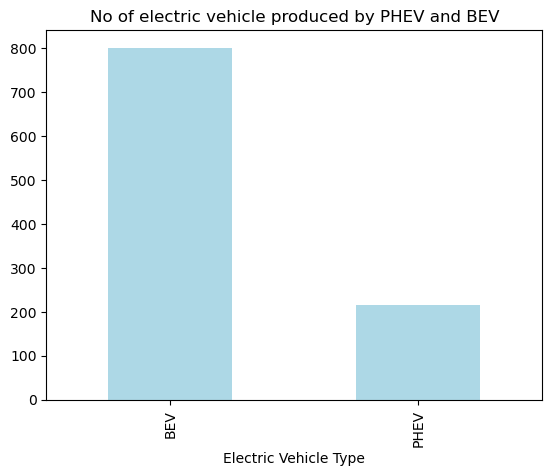

In [35]:
df['Electric Vehicle Type'].value_counts().plot(kind='bar', color='lightblue')
plt.title("No of electric vehicle produced by PHEV and BEV")

Text(0.5, 1.0, 'Top cities with most Evs')

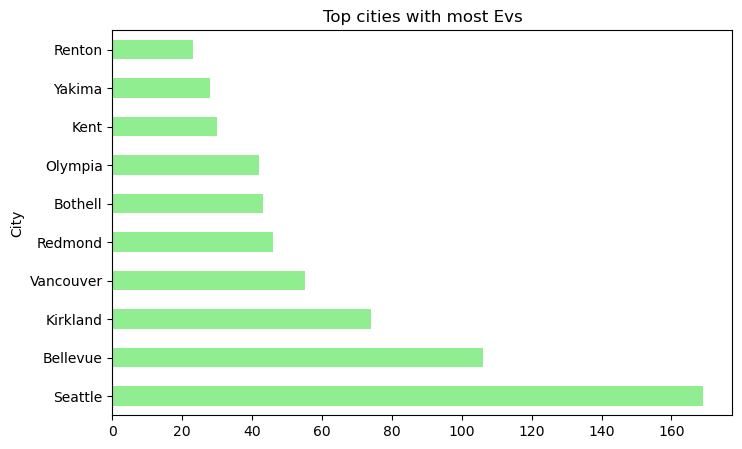

In [59]:
plt.figure(figsize=(8, 5))
df['City'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top cities with most Evs")

Text(0.5, 1.0, 'Distribution of Electric Vehicle')

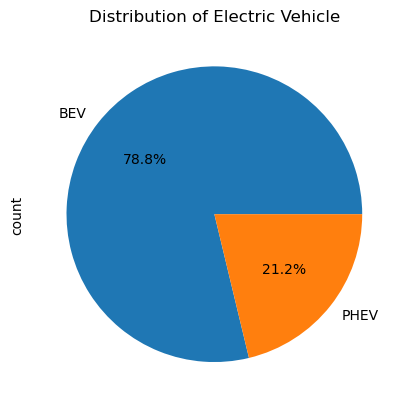

In [62]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Electric Vehicle")